# Análise Argentina

Neste notebook seŕa aplicado a séri temporal de covid envolvendo a Argentina

In [1]:
!pip install pymannkendall
# Importando as blibiotecas
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pymannkendall as mk
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller,acf, pacf
from statsmodels.tsa.arima_model import ARIMA

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
serie_arg = pd.read_csv('Séries Temporais Argentina.csv')
serie_arg.drop('Unnamed: 0',axis=1,inplace=True)
# Transformado a coluna date de object para datetime
serie_arg['Date'] = pd.to_datetime(serie_arg['Date'],format='%Y-%m-%d')
serie_arg['Mês'] = serie_arg['Date'].dt.month
serie_arg.head()

,Date,Confirmed,Recovered,Deaths,Ano,Mês
0,2020-01-22,0,0.0,0,2020,1
1,2020-01-23,0,0.0,0,2020,1
2,2020-01-24,0,0.0,0,2020,1
3,2020-01-25,0,0.0,0,2020,1
4,2020-01-26,0,0.0,0,2020,1


In [6]:
# Colocando a coluna da data para indice
serie_arg.set_index('Date',inplace=True)
serie_arg.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 713 entries, 2020-01-22 to 2022-01-03
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Confirmed  713 non-null    int64  
 1   Recovered  713 non-null    float64
 2   Deaths     713 non-null    int64  
 3   Ano        713 non-null    int64  
 4   Mês        713 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 33.4 KB


In [7]:
# Aplicando para casos confirmados
resultado_conf = mk.original_test(serie_arg['Confirmed'])

nomes = ['Tendência','Presença de tendência','p-valor','Estatística do teste',
         'Tau Kendall','Pontuação Kendall','Variância S','Declive','Intercepto']


for i,j in zip(nomes,resultado_conf):
  print(i,":",j)

Tendência : increasing
Presença de tendência : True
p-valor : 0.0
Estatística do teste : 39.82811531416033
Tau Kendall : 0.9967300691807051
Pontuação Kendall : 252998.0
Variância S : 40350714.666666664
Declive : 9413.412280701754
Intercepto : -1606470.7719298243


In [8]:
# Aplicando para óbitos 
resultado_mortes = mk.original_test(serie_arg['Deaths'])

for i,j in zip(nomes,resultado_mortes):
  print(i,":",j)

Tendência : increasing
Presença de tendência : True
p-valor : 0.0
Estatística do teste : 39.792731982541746
Tau Kendall : 0.9958042453945192
Pontuação Kendall : 252763.0
Variância S : 40347446.333333336
Declive : 209.08499207011005
Intercepto : -29586.257176959174


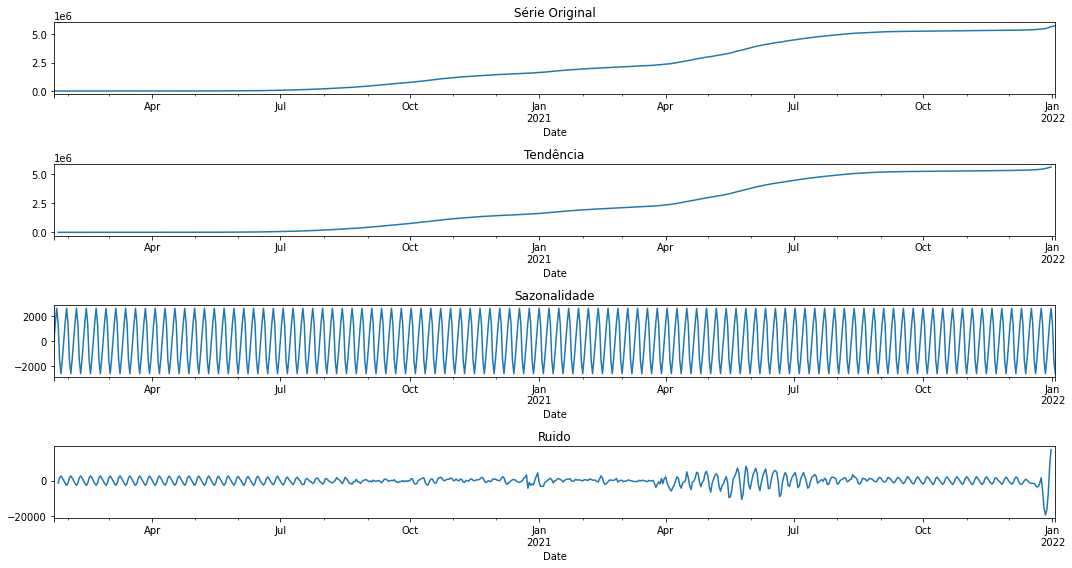

In [9]:
decom_conf = seasonal_decompose(serie_arg['Confirmed'])

fig, (ax1,ax2,ax3, ax4) = plt.subplots(4,1, figsize=(15,8))
decom_conf.observed.plot(ax=ax1,title='Série Original')
decom_conf.trend.plot(ax=ax2,title='Tendência')
decom_conf.seasonal.plot(ax=ax3,title='Sazonalidade')
decom_conf.resid.plot(ax=ax4,title='Ruido')
plt.tight_layout()

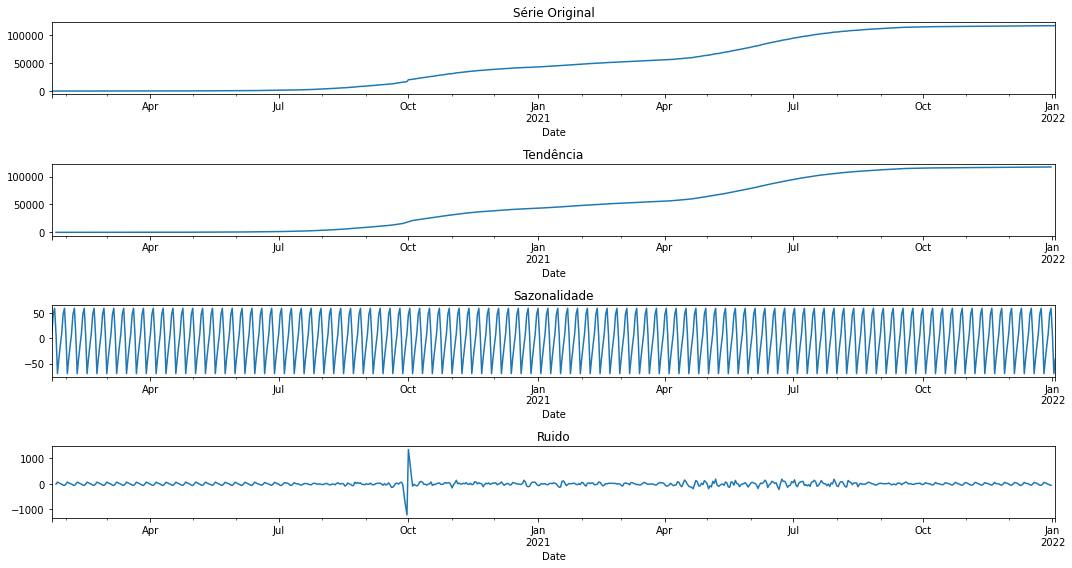

In [10]:
decom_morte = seasonal_decompose(serie_arg['Deaths'])

fig, (ax1,ax2,ax3, ax4) = plt.subplots(4,1, figsize=(15,8))
decom_morte.observed.plot(ax=ax1,title='Série Original')
decom_morte.trend.plot(ax=ax2,title='Tendência')
decom_morte.seasonal.plot(ax=ax3,title='Sazonalidade')
decom_morte.resid.plot(ax=ax4,title='Ruido')
plt.tight_layout()

In [11]:
# Separação entre treino e teste
treino = serie_arg[(serie_arg['Ano']<=2021)&(serie_arg['Mês']<12)]
teste = serie_arg[(serie_arg['Ano']==2021)&(serie_arg['Mês'] == 12)]

In [12]:
adf_conf = adfuller(serie_arg['Confirmed'])

print('Dickey-Fuller Aumentado')
print('Teste Estatístico: {:.4f}'.format(adf_conf[0]))
print('Valor-p: {:.4f}'.format(adf_conf[1]))
print('Valores Críticos:')
for key, value in adf_conf[4].items():
	print('\t{}: {:.4f}'.format(key, value))

Dickey-Fuller Aumentado
Teste Estatístico: 1.6965
Valor-p: 0.9981
Valores Críticos:
	1%: -3.4398
	5%: -2.8657
	10%: -2.5690


In [13]:
adf_mort = adfuller(serie_arg['Deaths'])

print('Dickey-Fuller Aumentado')
print('Teste Estatístico: {:.4f}'.format(adf_mort[0]))
print('Valor-p: {:.4f}'.format(adf_mort[1]))
print('Valores Críticos:')
for key, value in adf_mort[4].items():
	print('\t{}: {:.4f}'.format(key, value))

Dickey-Fuller Aumentado
Teste Estatístico: -1.3755
Valor-p: 0.5940
Valores Críticos:
	1%: -3.4398
	5%: -2.8657
	10%: -2.5690


In [14]:
df_diff_co = serie_arg['Confirmed'].diff(1)
df_diff_mor = serie_arg['Deaths'].diff(1)

In [16]:
lag_acf_co = acf(df_diff_co.dropna(), nlags=25)
lag_pacf_co = pacf(df_diff_mor.dropna(), nlags=25)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


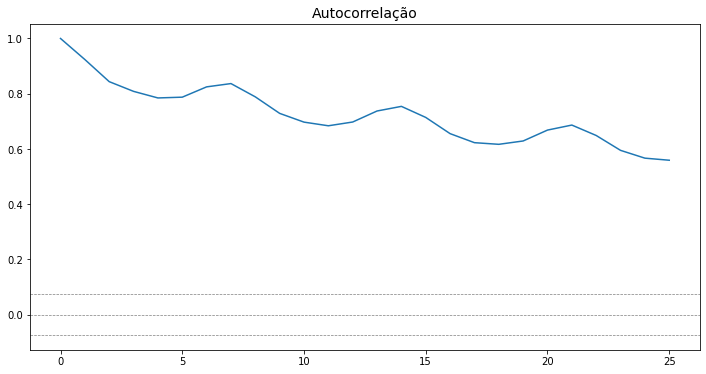

In [17]:
plt.figure(figsize=(12,6))
plt.plot(lag_acf_co)
plt.axhline(y=-1.96 / (np.sqrt((len(df_diff_co) - 1))), linestyle='--', color='gray', linewidth=0.7)
plt.axhline(y=0, linestyle='--', color='gray', linewidth=0.7)
plt.axhline(y=1.96 / (np.sqrt((len(df_diff_co) - 1))), linestyle='--', color='gray', linewidth=0.7)
plt.title("Autocorrelação",fontsize=14)
plt.show()

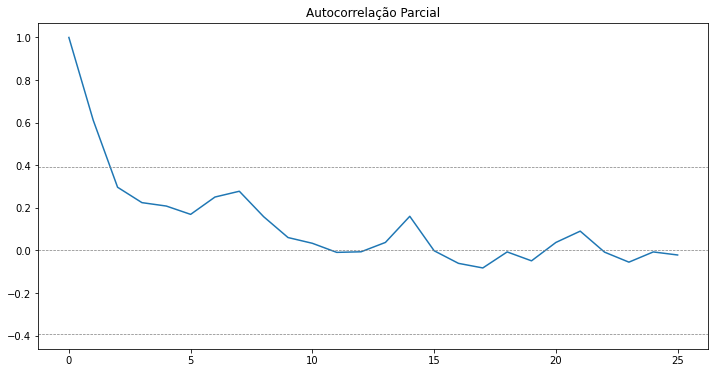

In [18]:
plt.figure(figsize=(12,6))
plt.plot(lag_pacf_co)
plt.axhline(y=-1.96 / (np.sqrt((len(lag_pacf_co ) - 1))), linestyle='--', color='gray', linewidth=0.7)
plt.axhline(y=0, linestyle='--', color='gray', linewidth=0.7)
plt.axhline(y=1.96 / (np.sqrt((len(lag_pacf_co ) - 1))), linestyle='--', color='gray', linewidth=0.7)
plt.title("Autocorrelação Parcial")
plt.show()

In [35]:
model = ARIMA(treino['Deaths'], order=(3,1,1))
result_AR = model.fit(disp = -1)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency informa

In [36]:
fc, se, conf = result_AR .forecast(31, alpha=0.05)

In [37]:
mape = np.mean(np.abs(fc - teste['Deaths'].values)/np.abs(teste['Deaths'].values))
mae = np.mean(np.abs(fc - teste['Deaths'].values)) 
rmse = np.mean((fc - teste['Deaths'])**2)**.5
print(mape)
print(mae)
print(rmse)

0.003000816247746464
350.99612454059036
415.0503367674094


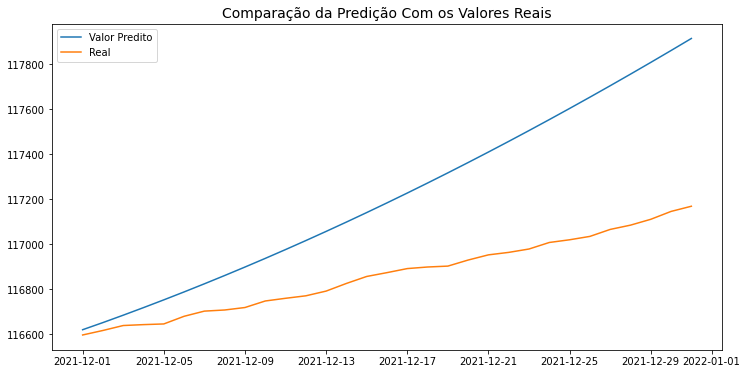

In [38]:
plt.figure(figsize=(12,6))
plt.title('Comparação da Predição Com os Valores Reais', fontsize=14)
plt.plot(teste.index,fc,label='Valor Predito')
plt.plot(teste.index,teste['Deaths'].values,label='Real')
plt.legend()